##Engenharia de Dados
 Jose R F Junior - web2ajax@gmail.com

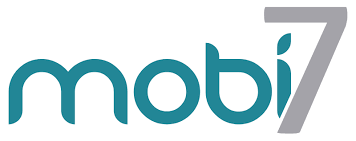

# **Problema**

# **Requisitos Funcionais obrigatórios:**

#        * 1 - Quantidade de tempo que os veículos passaram parados dentro de cada POI;

#        * 2 - Quantidade de tempo que os veículos estavam dentro de cada POI;

#        * 3 - Tempo total da frota gasto parado em cada POI;

#        * 4 - Tempo total parado por veículo, independente do POI. 

#        * 5 - Arquivo CSV constando (Nome do arquivo –  resultados_consolidado_POIs.csv): 


        


      



# <h1>**Checklist para Projetos de Data Science**</h1>

Checklist - Baseado nos *frameworks* CRISP-DM e na metodologia proposta por Aurélien Géron, esta é a rotina que se adequa à maior parte dos meu projetos de Data Science.


## **1. Entender o Problema**

* Olhar o todo e delimitar o escopo do projeto
* Como a solução vai ser usada?
* Quais são as soluções já existentes?
* Qual abordagem usar?
    * Aprendizado Supervisionado
    * Aprendizado Não Supervisionado
    * Aprendizado Por Reforço
* Qual é a métrica de performance?
* Qual a performance mínima esperada para atingir o objetivo?
* Liste as premissas básicas do projeto



## **2. Explorar os Dados**

* Criar uma cópia dos dados para a exploração
* Criar um Jupyter Notebook para documentar a exploração
* Estudar cada atributo e suas características:
    * Nome
    * Tipo
        * Categórica
        * Numérica
            * int
            * float
        * Estruturada
        * Não Estruturada
        * etc
    * % de valores ausentes
    * Ruído nos dados e tipo de ruído (outliers, estocásticos, erros de arredondamento)
    * Tipo de distribuição
        * Gaussiana
        * Uniforme
        * Logarítmica
        * etc
* Identificar a variável alvo (target)
* Visualizar os dados
* Estudar a correlação entre os dados
* Identificar as transformações que podem ser aplicadas
* Identificar os dados extras que podem ser úteis

## **3. Preparar os Dados**

* Trabalhar em cópias dos dados
* Escrever funções para todas as transformações


1. Limpeza dos Dados
    * Consertar ou remover outliers
    * Preencher os valores faltantes ou eliminar as linhas/colunas
        * Zero
        * Média
        * Mediana
        * etc
2. Seleção de atributos
    * Eliminar os atributos (*features*) que não contêm informações úteis

3. *Feature Engineering*
    * Discretizar variáveis contínuas
    * Decompor *features* (categóricas, data, tempo)
    * Aplicar transformações às variáveis
    * Agregar *features* para gerar novas
    
4. *Feature Scaling*
    * Normalizar ou padronizar *features*
    

## **4. Construção do Modelo (N/A)**

* Automatizar o maior número de passos possíveis
* Treinar mais de um modelo e comparar as performances
* Analisar as variáveis mais significativas para cada algoritmo
* *Fine-Tune* dos *hyperparameters*
* Uso de *cross-validation*
* Verificar o desempenho dos métodos *Ensemble*, combinando os modelos que tiveram os melhores desempenhos individuais
* Testar o desempenho do mesmo com o *dataset* de teste.

#  **5. Apresentação da Solução e Deploy (N/A)**

* Documentar todos as etapas
* Tornar todos os passos replicáveis (download de arquivos, uso da API do Kaggle)
* Lembrar do Storytelling
    * Decisores e Diretores provavelmente desconhecem a parte técnica
* Ver qual o melhor gráfico para contar cada *insight* descoberto
* Escrever testes unitários
* Criar rotinas de monitoramento e alertas
* Determinar quando atualizar o modelo

# 1 - **Modelagem conceitual dos dados**
Sua principal finalidade é capturar os requisitos de informação e regras de negócio sob o ponto de vista do negócio. 

# **OBS: Neste projeto, vai ser levado em conta somente o PROBLEMA PROPOSTO.**


- Entidades;

- Atributos;

- Relacionamentos;

 #Modelo Entidade Relacionamento - MER, (ORIGINAL)

Nome do campo.
Chave.
A chave Primária (P) é uma coluna ou conjunto de colunas que identifica exclusivamente o restante dos dados em qualquer linha específica da tabela.
A chave Externa (E) é uma coluna na tabela que é uma chave primária em outra tabela, indicando que quaisquer dados em uma coluna de chave externa deve ter dados correspondentes na outra tabela em que essa coluna é a chave primária. Para bancos de dados, essa correspondência é conhecida como integridade referencial.
O valor NOT NULL (NN) significa que a coluna deve ter um valor em cada linha. Se NULL foi utilizado, essa coluna pode ser deixada em branco em uma linha específica.
Tipo de dado.
Tamanho do campo.
Descrição do objetivo de cada campo.


# MANEIRA - 1 - **Arquivos CSV para Cloud Storage, usando BigQuery**

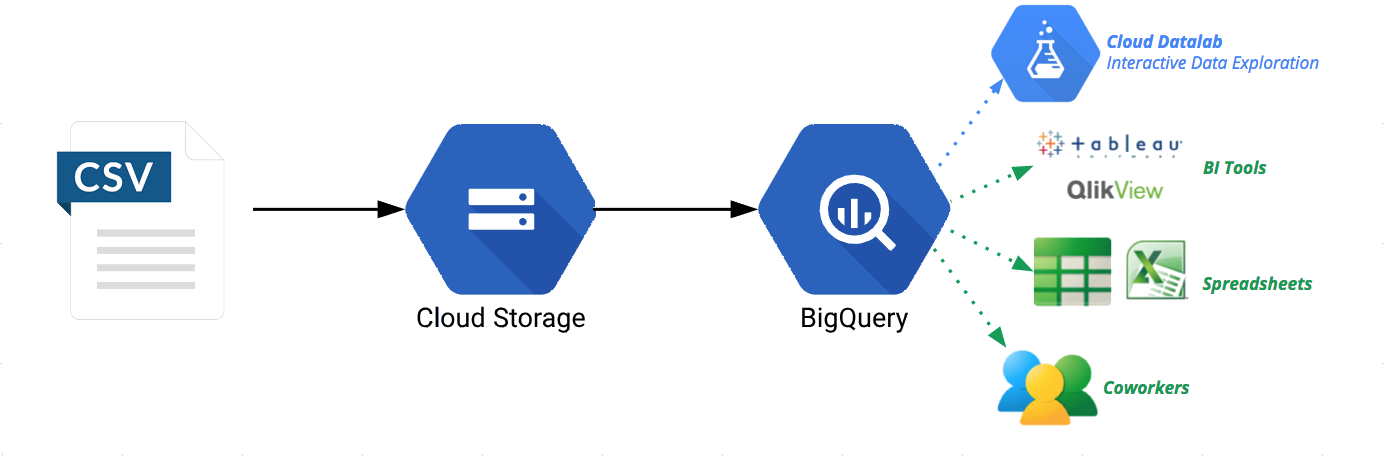

# MANEIRA - 2 - ****Arquivos CSV usando Spark****

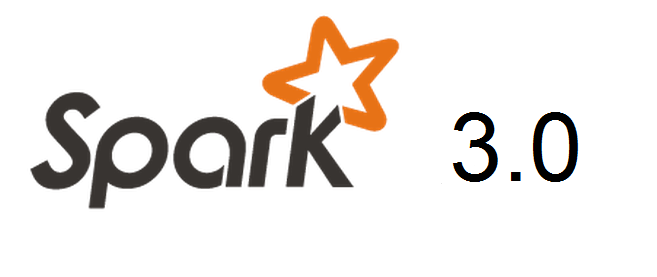

# Instalando Spark e Java

In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz
!tar -xvf spark-3.0.0-bin-hadoop3.2.tgz

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"

##Instalando findspark

In [ ]:
!pip install -q findspark

In [ ]:
# tornar o pyspark "importável"
import findspark
findspark.init('spark-3.0.0-bin-hadoop3.2')

##Importando as bibliotecas do PySpark

In [ ]:
%time 
# importando as bibliotecas"
from pyspark import SparkContext, SparkConf
from pyspark.sql import SQLContext, SparkSession
from pyspark.streaming import StreamingContext
from pyspark.sql.types import StructType, StructField, DoubleType, IntegerType, StringType

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.11 µs


In [ ]:
%time 
# setandos as variáveis"
ss = SparkSession.builder.master("local[*]").getOrCreate()
sc = SparkContext.getOrCreate(SparkConf().setMaster("local[*]"))
sql_sc = SQLContext(sc)
ssc = StreamingContext(sc, 2)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.15 µs


##Fonte de Dados GitHub.

In [3]:
%time 
! git clone https://github.com/GCPBigData/Projeto-Mobi7

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 5.25 µs
Cloning into 'Projeto-Mobi7'...
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 11 (delta 0), reused 11 (delta 0), pack-reused 0
Unpacking objects: 100% (11/11), done.


##Lendo os arquivos CSV

##OBS : Todos os projeto que eu trabalho, eu sempre converto os arquivos csv para parquet, neste caso que o volume de dados e pequeno não é necessário.



Motivos: https://www.linkedin.com/pulse/apache-parquet-jose-r-f-junior/

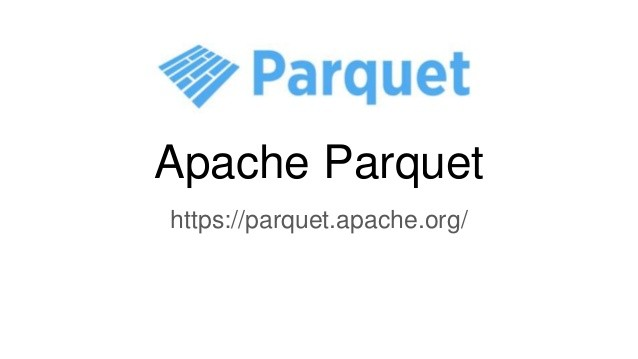

##Transformando os arquivos CSV em Parquet

In [ ]:
#CSV to Parquet
#pandas_df_spark_base_pois_def = pandas_df_spark_base_pois_def.to_parquet('/content/Projeto-Mobi7/dados/base_pois_def.gzip', compression='gzip')  
#pandas_df_spark_posicoes = pandas_df_spark_posicoes.to_parquet('/content/Projeto-Mobi7/dados/posicoes.gzip', compression='gzip')  


# Instalando Pandas e as perfumarias

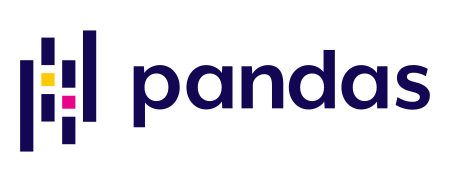

In [1]:
%time 
import numpy as np
import pandas as pd
import geopy.distance as gp
import matplotlib.pyplot as plt
import scipy.stats as st
import pyarrow as pa

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.2 µs


In [ ]:
#Lendo com SS

import time
%time 
start = time.time()

spark_base_pois_def = ss.read.load("/content/Projeto-Mobi7/dados/base_pois_def.csv",format="csv", sep=",", inferSchema="true", header="true")
spark_posicoes = ss.read.load("/content/Projeto-Mobi7/dados/posicoes.csv",format="csv", sep=",", inferSchema="true", header="true")

print('seconds: {}'.format(time.time()-start))

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.39 µs
seconds: 0.7804989814758301


In [13]:
#Lendo com Pandas

import time
%time 
start = time.time()

pandas_df_base_pois_def = pd.read_csv('/content/Projeto-Mobi7/dados/base_pois_def.csv')
pandas_df_posicoes = pd.read_csv('/content/Projeto-Mobi7/dados/posicoes.csv')

print('seconds: {}'.format(time.time()-start))

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 12.4 µs
seconds: 0.011001825332641602


In [ ]:
pandas_df_base_pois_def.head(20)

In [ ]:
pandas_df_posicoes.head(20)

# **Exluindo NaN das colunas se existir** 


In [7]:
# ver o shape antes
shape_antes = pandas_df_base_pois_def.shape
print("Antes:\t", shape_antes)
		
pandas_df_base_pois_def.dropna(subset=['nome'], inplace=True)
pandas_df_base_pois_def.dropna(subset=['raio'], inplace=True)
pandas_df_base_pois_def.dropna(subset=['latitude'], inplace=True)

# ver o shape depois
shape_depois = pandas_df_base_pois_def.shape
print("Depois:\t", shape_depois)

Antes:	 (24, 4)
Depois:	 (24, 4)


In [8]:
# ver o shape antes
shape_antes = pandas_df_posicoes.shape
print("Antes:\t", shape_antes)
		
pandas_df_posicoes.dropna(subset=['placa'], inplace=True)
pandas_df_posicoes.dropna(subset=['data_posicao'], inplace=True)
pandas_df_posicoes.dropna(subset=['velocidade'], inplace=True)
pandas_df_posicoes.dropna(subset=['longitude'], inplace=True)
pandas_df_posicoes.dropna(subset=['latitude'], inplace=True)
pandas_df_posicoes.dropna(subset=['longitude'], inplace=True)

# ver o shape depois
shape_depois = pandas_df_posicoes.shape
print("Depois:\t", shape_depois)

Antes:	 (928, 6)
Depois:	 (928, 6)


## **Ajustes pandas_df_posicoes**

# Converte data_posicao para datetime

In [14]:
import time
%time 
start = time.time()

pandas_df_posicoes['data_posicao'] = pd.to_datetime(pandas_df_posicoes['data_posicao'], format="%a %b %d %Y %H:%M:%S GMT%z", exact=False)

print('seconds: {}'.format(time.time()-start))


CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.77 µs
seconds: 0.039808034896850586


# Determina se o veículo está parado ou não em cada registro.

In [15]:
import time
%time 
start = time.time()

pandas_df_posicoes['parado'] = pandas_df_posicoes.apply(lambda x: (not x.ignicao and x.velocidade < 5), axis = 1)

print('seconds: {}'.format(time.time()-start))

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.77 µs
seconds: 0.027167558670043945


# Calcula os tempos entre dois registros consecutivos

In [16]:
import time
%time 
start = time.time()

pandas_df_posicoes = pandas_df_posicoes.sort_values(by=['placa','data_posicao'])
pandas_df_posicoes['tempo'] = (pandas_df_posicoes['data_posicao'] - pandas_df_posicoes.groupby(['placa'])['data_posicao'].shift(1)).dt.seconds

print('seconds: {}'.format(time.time()-start))

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.96 µs
seconds: 0.01941370964050293


# Criando DataFrame usando SQLContext 

In [ ]:
import time
%time 
start = time.time()

pandas_df_base_pois_def = sql_sc.createDataFrame(pandas_df_base_pois_def)
pandas_df_posicoes = sql_sc.createDataFrame(pandas_df_posicoes)

print('seconds: {}'.format(time.time()-start))

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.01 µs
seconds: 0.13222861289978027


# Criando 2 Views (vw_base_pois_def , vw_posicoes)

In [ ]:
import time
%time 
start = time.time()

pandas_df_base_pois_def.createOrReplaceTempView("vw_base_pois_def")
pandas_df_posicoes.createOrReplaceTempView("vw_posicoes")

print('seconds: {}'.format(time.time()-start))

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.68 µs
seconds: 0.08596253395080566


#Consultando com SparkSQL
OBS: neste caso para ficar mais rapido e simples usei PANDAS.

In [ ]:
%time 
pandas_df_posicoes = sql_sc.sql("SELECT * FROM vw_posicoes")
pandas_df_posicoes.show()

In [ ]:
%time 
pandas_df_base_pois_def = sql_sc.sql("SELECT * FROM vw_base_pois_def")
pandas_df_base_pois_def.show()

##Verificando as informações estatísticas ! 

In [ ]:
pandas_df_base_pois_def.describe().toPandas().transpose()

In [ ]:
pandas_df_posicoes.describe().toPandas().transpose()

#1 . ETL


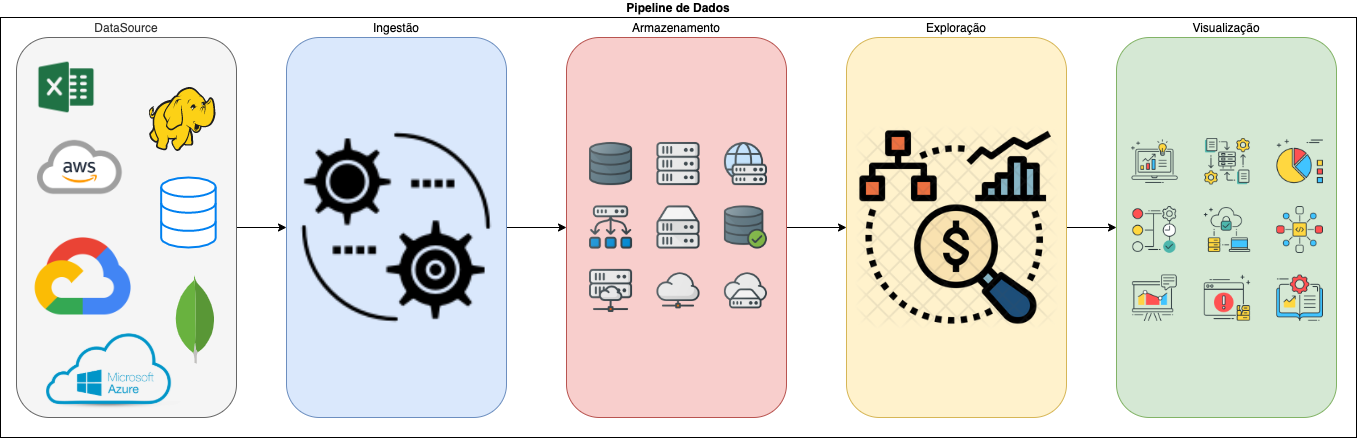

In [126]:
import time
%time 
start = time.time()

resultadoETLDados_A = []

for contadorPosicoes in pandas_df_posicoes.itertuples():
    for contadorBasePois in pandas_df_base_pois_def.itertuples():

        #
        # Calcula a distancia do veiculo ao POI -> pandas_df_posicoes
        #
        distancia = gp.distance((contadorPosicoes.latitude, contadorPosicoes.longitude), 
                                (contadorBasePois.latitude, contadorBasePois.longitude)).meters

        #     
        # Cria um registro, se o veiculo estiver em um POI -> pandas_df_posicoes
        #
        if (distancia <= contadorBasePois.raio):
            resultadoDados.append({'placa': contadorPosicoes.placa, 
                                   'tempo': contadorPosicoes.tempo, 
                                   'poi': contadorBasePois.nome, 
                                   'parado': contadorPosicoes.parado})

df_resultadoDados = pd.DataFrame(resultadoETLDados_A)

print('seconds: {}'.format(time.time()-start))

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.77 µs
seconds: 5.72379469871521


In [ ]:
import time
%time 
start = time.time()

df_resultadoDados.head(10)

print('seconds: {}'.format(time.time()-start))

# **Exluindo NaN das colunas se existir** 


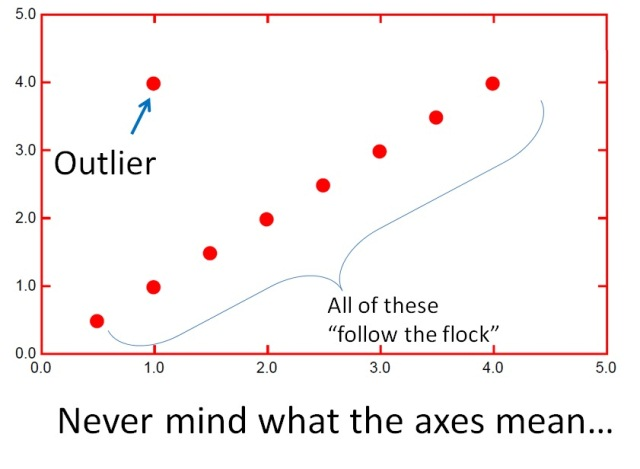

In [21]:
# ver o shape antes
shape_antes = df_resultadoDados.shape
print("Antes:\t", shape_antes)
		
df_resultadoDados.dropna(subset=['placa'], inplace=True)
df_resultadoDados.dropna(subset=['tempo'], inplace=True)
df_resultadoDados.dropna(subset=['poi'], inplace=True)
df_resultadoDados.dropna(subset=['parado'], inplace=True)

# ver o shape depois
shape_depois = df_resultadoDados.shape
print("Depois:\t", shape_depois)

Antes:	 (770, 4)
Depois:	 (768, 4)


# **Plotando**

In [ ]:
import seaborn as sns
  
plt.figure(figsize=(15,15))  
seaborn.set(style = 'whitegrid')  
  
# read csv and plot 
data =  df_resultadoDados 
sns.barplot(x ="placa", y ="tempo", data = data)  

In [ ]:
import seaborn as sns

sns.set_theme(style="ticks")
df = df_resultadoDados
sns.pairplot(df, hue="placa")

# Agrupando e somando, placa, poi, parado, tempo

In [ ]:
import time
%time 
start = time.time()

somatoria = df_resultadoDados.groupby(['placa','poi','parado'], as_index=False)['tempo'].sum()
somatoria

print('seconds: {}'.format(time.time()-start))

# **Plotando**

In [ ]:
import seaborn as sns
  
plt.figure(figsize=(15,15))  
seaborn.set(style = 'whitegrid')  
  
data =  somatoria 
sns.barplot(x ="placa", y ="tempo", data = data)  

In [ ]:
import seaborn as sns

sns.set_theme(style="ticks")
df = somatoria
sns.pairplot(df, hue="placa")

# * 1 - Quantidade de tempo que os veículos passaram parados dentro de cada POI.

In [ ]:
import time
%time 
start = time.time()

carrosParadosPoi = somatoria[somatoria['parado']==True].groupby(['placa','poi'], as_index=False)['tempo'].sum()
carrosParadosPoi

print('seconds: {}'.format(time.time()-start))

# **Plotando**

In [ ]:
import seaborn as sns
  
plt.figure(figsize=(15,15))  
seaborn.set(style = 'whitegrid')  
  
data =  somatoria 
sns.barplot(x ="placa", y ="tempo", data = data)  

In [ ]:
import seaborn as sns

sns.set_theme(style="ticks")
df = somatoria
sns.pairplot(df, hue="placa")

## * 2 - Quantidade de tempo que os veículos estavam dentro de cada POI;

In [ ]:
import time
%time 
start = time.time()

carrosTempoPoi = somatoria.groupby(['placa','poi'], as_index=False)['tempo'].sum()
carrosTempoPoi

print('seconds: {}'.format(time.time()-start))

# **Plotando**

In [ ]:
import seaborn as sns
  
plt.figure(figsize=(15,15))  
seaborn.set(style = 'whitegrid')  
  
data =  carrosTempoPoi 
sns.barplot(x ="placa", y ="tempo", data = data)  

In [ ]:
import seaborn as sns

sns.set_theme(style="ticks")
df = carrosTempoPoi
sns.pairplot(df, hue="placa")

## * 3 - Tempo total da frota gasto parado em cada POI;

In [106]:
import time
%time 
start = time.time()

tempoTotalParadoPoi = somatoria[somatoria['parado']==True].groupby(['poi'], as_index=False)['tempo'].sum()
tempoTotalParadoPoi

print('seconds: {}'.format(time.time()-start))

,poi,tempo
0,PONTO 1,471.0
1,PONTO 2,2432.0
2,PONTO 24,995999.0


# **Plotando**

In [ ]:
import seaborn as sns
  
plt.figure(figsize=(15,15))  
seaborn.set(style = 'whitegrid')  
  
data =  tempoTotalParadoPoi 
sns.barplot(x ="poi", y ="tempo", data = data)  

In [ ]:
import seaborn as sns

sns.set_theme(style="ticks")
df = tempoTotalParadoPoi
sns.pairplot(df, hue="poi")

## * 4 - Tempo total parado por veículo, independente do POI.

In [ ]:
import time
%time 
start = time.time()

carrosParadosIndependetePoi = pandas_df_posicoes[pandas_df_posicoes['parado']==True].groupby(['placa'], as_index=False)['tempo'].sum()
carrosParadosIndependetePoi

print('seconds: {}'.format(time.time()-start))

# **Plotando**

In [ ]:
import seaborn as sns
  
plt.figure(figsize=(15,15))  
seaborn.set(style = 'whitegrid')  
  
data =  carrosParadosIndependetePoi 
sns.barplot(x ="placa", y ="tempo", data = data)  

In [ ]:
import seaborn as sns

sns.set_theme(style="ticks")
df = carrosParadosIndependetePoi
sns.pairplot(df, hue="placa")

## * 4.1 - Tempo total andando por veículo, independente do POI.

In [ ]:
import time
%time 
start = time.time()

carrosAndandoIndependetePoi = pandas_df_posicoes[pandas_df_posicoes['parado']==False].groupby(['placa'], as_index=False)['tempo'].sum()
carrosAndandoIndependetePoi

print('seconds: {}'.format(time.time()-start))

# **Plotando**

In [ ]:
import seaborn as sns
  
plt.figure(figsize=(15,15))  
seaborn.set(style = 'whitegrid')  
  
data =  carrosAndandoIndependetePoi 
sns.barplot(x ="placa", y ="tempo", data = data)  

In [ ]:
import seaborn as sns

sns.set_theme(style="ticks")
df = carrosAndandoIndependetePoi
sns.pairplot(df, hue="placa")

# ETL

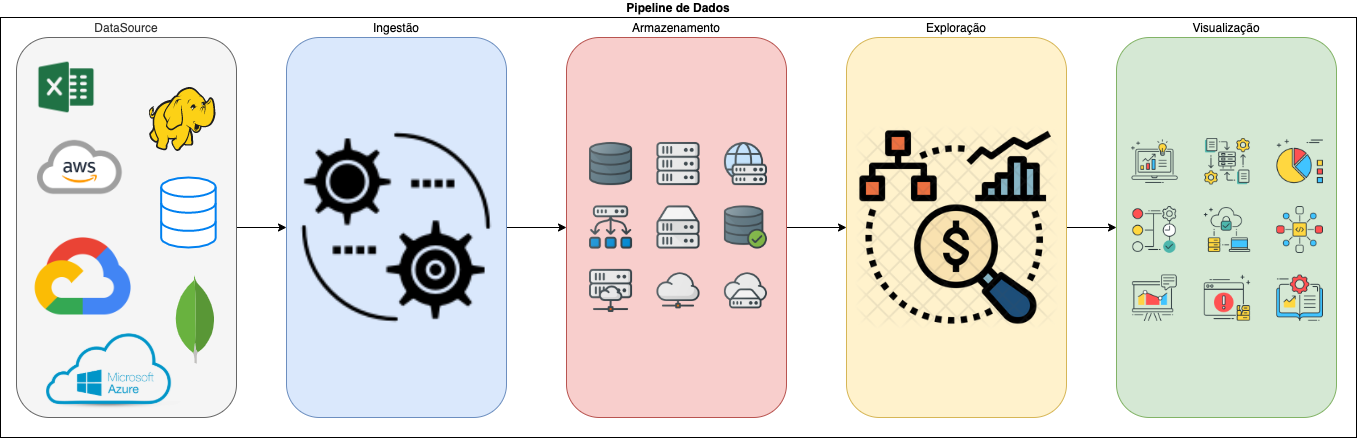

In [ ]:
import time
%time 
start = time.time()

resultadoETLDados_B = []

variavelTotal = 0

carros = pd.unique(carrosParadosIndependetePoi['placa'])

for contadorCarro in carros:
    rotulos = {'placa': contadorCarro}
     
    # 
    # Adiciona colunas com o tempo parado em cada POI -> (carrosParadosPoi)
    #
    for contadorParados in carrosParadosPoi[carrosParadosPoi['placa'] == contadorCarro].itertuples():
        rotulos[contadorParados.poi.replace(' ','_').lower()+'[parado]'] = contadorParados.tempo

    #
    # Adiciona colunas com o tempo em cada POI -> (carrosTempoPoi)
    #
    for contadorParados in carrosTempoPoi[carrosTempoPoi['placa'] == contadorCarro].itertuples():
        rotulos[contadorParados.poi.replace(' ','_').lower()+'_total'] = contadorParados.tempo
    #
    # Adiciona coluna com o tempo total parado -> (carrosParadosIndependetePoi)
    #
    for contadorParados in carrosParadosIndependetePoi[carrosParadosIndependetePoi['placa'] == contadorCarro].itertuples():
        rotulos['total_parado'] = contadorParados.tempo
        variavelTotal += contadorParados.tempo
    
    resultadoETLDados_B.append(rotulos)
   
    #
    #Rotula a coluna de Frotas de Carros
    #
    rotulos = {'placa': 'FROTA_CARROS'}
#
# Adiciona colunas com o tempo da frota parada em cada POI
#
for contadorParados in tempoTotalParadoPoi.itertuples():
    rotulos[contadorParados.poi.replace(' ','_').lower()+'[parado]'] = contadorParados.tempo

#
#Rotula a coluna de Totais
#
rotulos['total_parado'] = variavelTotal

resultadoETLDados_B.append(rotulos)

df_saida = pd.DataFrame(resultadoETLDados_B).fillna(0)
df_saida

print('seconds: {}'.format(time.time()-start))

# **Plotando**

# Salvando o CSV

In [123]:
import time
%time 
start = time.time()

colunas = df_saida.columns.tolist()
colunas.sort()
df_saida[colunas].to_csv('/content/Projeto-Mobi7/dados/resultados_consolidados_POIs.csv', index=False)

print('seconds: {}'.format(time.time()-start))

In [124]:
import time
%time 
start = time.time()

colunas = df_saida.columns.tolist()
colunas.sort()
df_saida[colunas].to_csv('/content/Projeto-Mobi7/dados/resultados_consolidados_POIsPK.csv', index=True)

print('seconds: {}'.format(time.time()-start))

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 4.77 µs
seconds: 0.010530233383178711


# Arquitetura Java - Batch

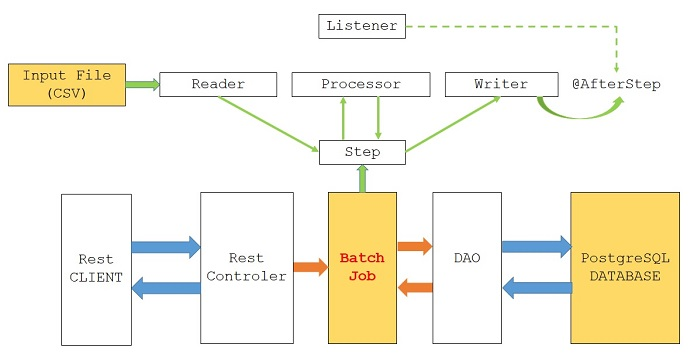

#**Indexando**

In [132]:
#Lendo com Pandas

import time
%time 
start = time.time()

pandas_df_base_pois_def = pd.read_csv('/content/Projeto-Mobi7/dados/base_pois_def.csv')
pandas_df_posicoes = pd.read_csv('/content/Projeto-Mobi7/dados/posicoes.csv')

pandas_df_base_pois_def = pandas_df_base_pois_def.rename_axis('id').reset_index()
pandas_df_posicoes = pandas_df_posicoes.rename_axis('id').reset_index()

print('seconds: {}'.format(time.time()-start))




CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.34 µs
seconds: 0.017726421356201172


In [133]:
colunas = pandas_df_base_pois_def.columns.tolist()
colunas.sort()
pandas_df_base_pois_def[colunas].to_csv('/content/Projeto-Mobi7/dados/base_pois_defBD.csv', index=False)

In [134]:
colunas = pandas_df_posicoes.columns.tolist()
colunas.sort()
pandas_df_posicoes[colunas].to_csv('/content/Projeto-Mobi7/dados/posicoesBD.csv', index=False)